### Î™®Îç∏ Í∞úÏöî

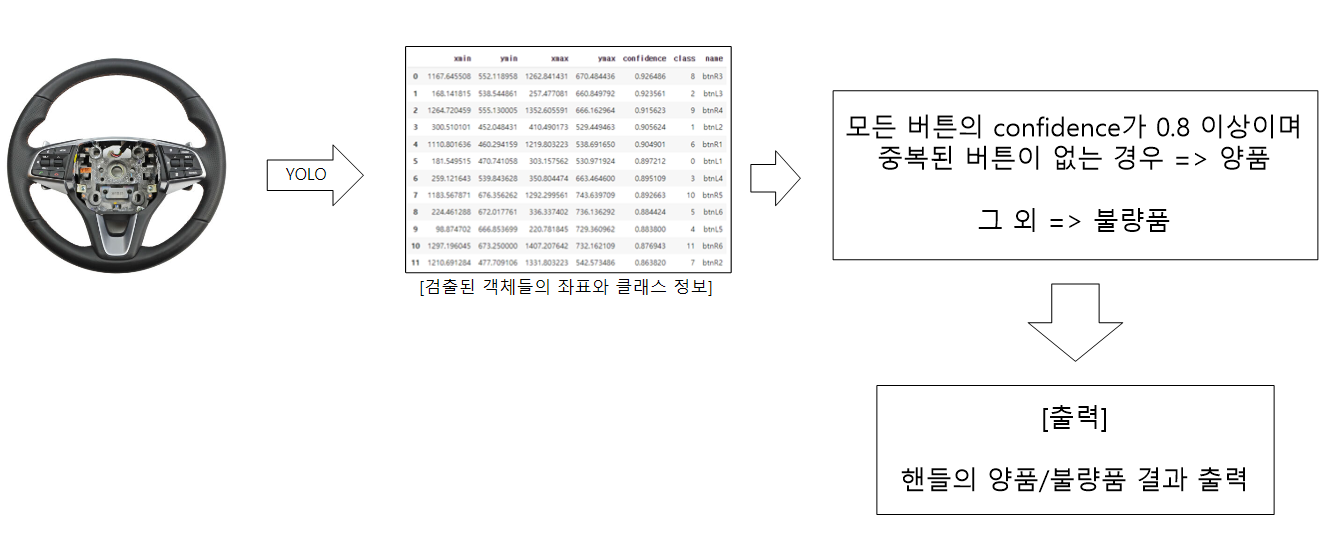

1. Ìï∏Îì§Ïùò Ï†ÑÏ≤¥Ïù¥ÎØ∏ÏßÄÎ•º YOLOÏùò Ïù∏Ìíã Ïù¥ÎØ∏ÏßÄÎ°ú ÏÇ¨Ïö©
2. YOLOÏùò Í≤∞Í≥ºÎ•º Î∞îÌÉïÏúºÎ°ú confidenceÍ∞íÍ≥º class nameÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ìï∏Îì§Ïùò ÏñëÌíà/Î∂àÎüâÌíàÏùÑ ÌåêÎ≥Ñ

# Í≤∞Í≥º

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import torch
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏóê Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î†§ÏÑú Ï∂úÎ†•Ìï¥Ï£ºÎäî Ìï®Ïàò
def plot_boxes(results, frame):
    # results : [xmin, ymin, xmax, ymax, conf, clsss, name] ÏúºÎ°ú Íµ¨ÏÑ±Îêú ÏöúÎ°úÏùò Ï∂úÎ†•
    # frame : ÏöúÎ°úÏóê ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìïú Ïù¥ÎØ∏ÏßÄ

    # colors : Î∞îÏö¥Îî©Î∞ïÏä§ ÏÉâ(size = (2, channel))
    colors = [
                (255, 0, 0), # Blue : Normal
                (0, 0, 255)  # Red : Abnormal
              ]

    for i in range(len(results)):
        # resultsÏóêÏÑú Îß® ÏúÑÏóêÏÑú Î∂ÄÌÑ∞ ÏÇ¨Ïö©ÌïòÎ©∞, Ìï¥Îãπ ÌñâÏùÑ rowÏóê Ï†ÄÏû•ÌïòÏó¨ ÏÇ¨Ïö©
        row = results.loc[i, :].values.tolist()

        x1, y1, x2, y2 = int(row[0]), int(row[1]), int(row[2]), int(row[3])

        # confidence Í∞íÏù¥ 0.8 Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Ï†ïÏÉÅ Î≤ÑÌäºÏúºÎ°ú ÌåêÎã®ÌïòÎ©∞ ÌååÎûÄÏÉâ Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î¶º
        if row[4] >= 0.80:
            color = colors[0]

        # confidence Í∞íÏù¥ 0.3 Ïù¥ÏÉÅ 0.8 ÎØ∏ÎßåÏù∏ Í≤ΩÏö∞ ÎπÑÏ†ïÏÉÅ Î≤ÑÌäºÏúºÎ°ú ÌåêÎã®ÌïòÎ©∞ Îπ®Í∞ÑÏÉâ Î∞îÏö¥Îî© Î∞ïÏä§Î•º Í∑∏Î¶º
        elif row[4] >= 0.3:
            color = colors[1]

        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)

    cv2_imshow(cv2.resize(frame, [896, 640]))
    return 

In [ ]:
# yolo weight Ï†ÄÏû• Í≤ΩÎ°ú
weight_path = '/content/drive/MyDrive/DSBA_·Ñé·Ö¨·Ñå·Ö©·Üº·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_1·Ñå·Ö©/·Ñé·Ö¨·Ñå·Ö©·Üº_·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/result/best_v5.pt'

model = torch.hub.load("ultralytics/yolov5", "custom", path=weight_path, force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 üöÄ 2022-11-4 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 157 layers, 7042489 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
img = cv2.imread('/content/drive/MyDrive/DSBA_·Ñé·Ö¨·Ñå·Ö©·Üº·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥_1·Ñå·Ö©/·Ñé·Ö¨·Ñå·Ö©·Üº_·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/test_images/abnormal2.jpg')

# yoloÏóê imgÎ•º Ïù∏ÌèøÏúºÎ°ú ÏûÖÎ†•Ìïú Í≤∞Í≥ºÎ•º results Î≥ÄÏàòÏóê Ï†ÄÏû•
results = model(img, size=640)

In [ ]:
# resultsÎ•º pandas dataframeÏúºÎ°ú Î≥ÄÌôòÌïú ÌõÑ Ï§ëÎ≥µÍ≤ÄÏ∂úÎêú Í≤∞Í≥ºÎ•º ÏÇ≠Ï†ú
result_df = pd.DataFrame(results.pandas().xyxy[-1])
result_df = result_df.drop_duplicates(['name'], keep='first')

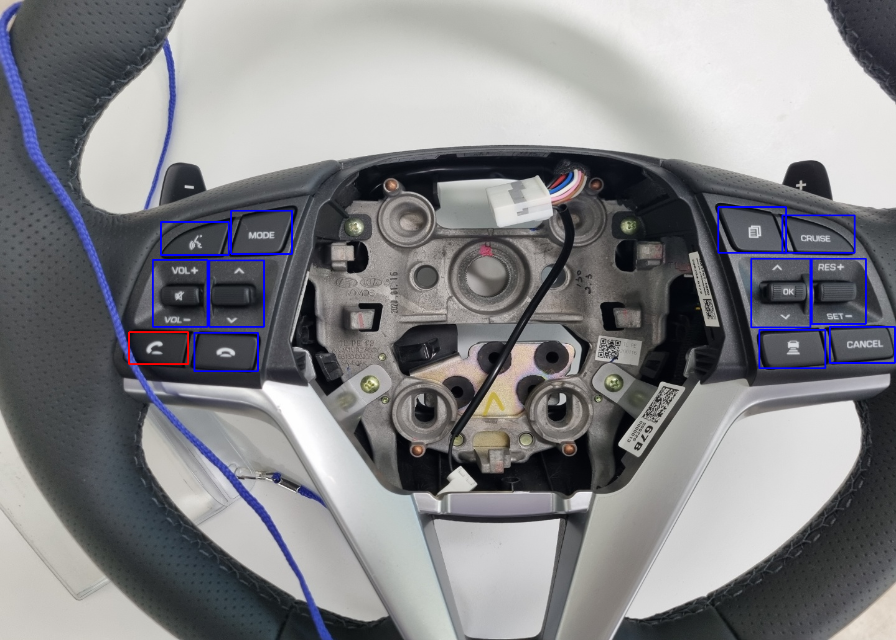

In [ ]:
# Í≤ÄÏ∂ú Í≤∞Í≥º
plot_boxes(result_df, img.copy())